In [4]:
%load_ext autoreload
%autoreload 2

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time
import napari

In [5]:
os.chdir('/home/ali/packages/s2p-lbm/')

from suite3d.job import Job
from suite3d import lbmio, utils, ui
from suite3d import tiff_utils as tfu

In [6]:
## Find all the tiffiles in the tif path
tif_path = r'/mnt/md0/data/demo'
tifs = tfu.get_tif_paths(tif_path)[:2]

In [7]:
# Set the mandatory parameters
params = {
    # volume rate
    'fs': tfu.get_vol_rate(tifs[0]),
    # planes to analyze. 0 is deepest, 30 is shallowest (corrected for ScanImage channel IDs)
    'planes' : n.arange(30),
    # Decay time of the Ca indicator in seconds. 1.3 for GCaMP6s. This example is for GCamP8m
    'tau' : 1.3
}

In [8]:
# Create the job
job = Job('/mnt/md0/runs','Demo-GPU', tifs = tifs[:2],
          params=params, create=True, overwrite=True, verbosity = 3)

Job directory /mnt/md0/runs/s3d-Demo-GPU already exists
Loading job directory for Demo-GPU in /mnt/md0/runs
   Loading dirs 
      Found dir registered_data
      Found dir summary
      Found dir iters
   Loading default params
      Updating param fs
      Updating param planes
      Updating param tau
   Updated main params file


In [9]:
# optional parameters for initialization
# load 1 file to initialize
job.params['n_init_files'] = 1
# use all of the frames in the loaded init files 
# if your files are really big, set this to <500 total
job.params['init_n_frames'] = None

# Set to None to auto-compute the crosstalk coefficient
# You can set a float value between 0-1 (usually around 0.1-0.3) to override the calculation
job.params['override_crosstalk'] = None
# number of processors to use
job.params['n_proc_corr'] = 20

   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/summary
   Updated main params file
Launching initial pass
Saving summary to /mnt/md0/runs/s3d-Demo-GPU/summary/summary.npy
Loading /mnt/md0/data/demo/AH007_ROI3p33um_NOSCREEN_-400um_00001_00001.tif
Loaded 1 files, total 6.82 GB
   Loaded movie with 100 frames and shape 30, 1202, 1015
         Enforcing positivity in mean image


/home/ali/packages/s2p-lbm/suite3d/utils.py:186: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saving figure to /mnt/md0/runs/s3d-Demo-GPU/summary/crosstalk_plots
saved
Close figure


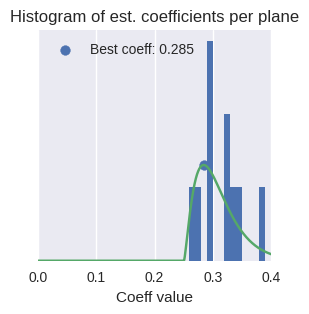

   Subtracting with estimated coefficient 0.285
         Subtracting plane 0 from 15
         Subtracting plane 1 from 16
         Subtracting plane 2 from 17
         Subtracting plane 3 from 18
         Subtracting plane 4 from 19
         Subtracting plane 5 from 20
         Subtracting plane 6 from 21
         Subtracting plane 7 from 22
         Subtracting plane 8 from 23
         Subtracting plane 9 from 24
         Subtracting plane 10 from 25
         Subtracting plane 11 from 26
         Subtracting plane 12 from 27
         Subtracting plane 13 from 28
         Subtracting plane 14 from 29
   Estimating fusing shifts
   Using best fuse shift of 13
   Building ops file
   Saved init mov to /mnt/md0/runs/s3d-Demo-GPU/summary/init_mov.npy
   Aligning planes
float64
20
      Fixing plane alignment outliers
   Fusing and padding init mov
0 138 0 138 (30, 100, 1256, 973) (30, 100, 1202, 1015)
151 283 138 270 (30, 100, 1256, 973) (30, 100, 1202, 1015)
296 428 270 402 (30, 100, 1256

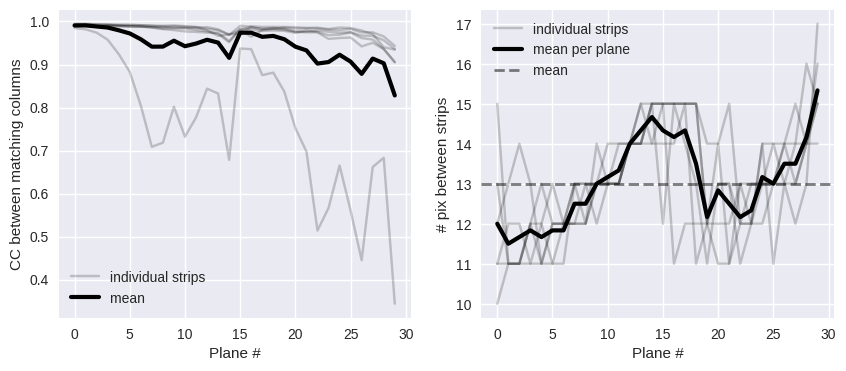

In [19]:
%%time
job.run_init_pass()

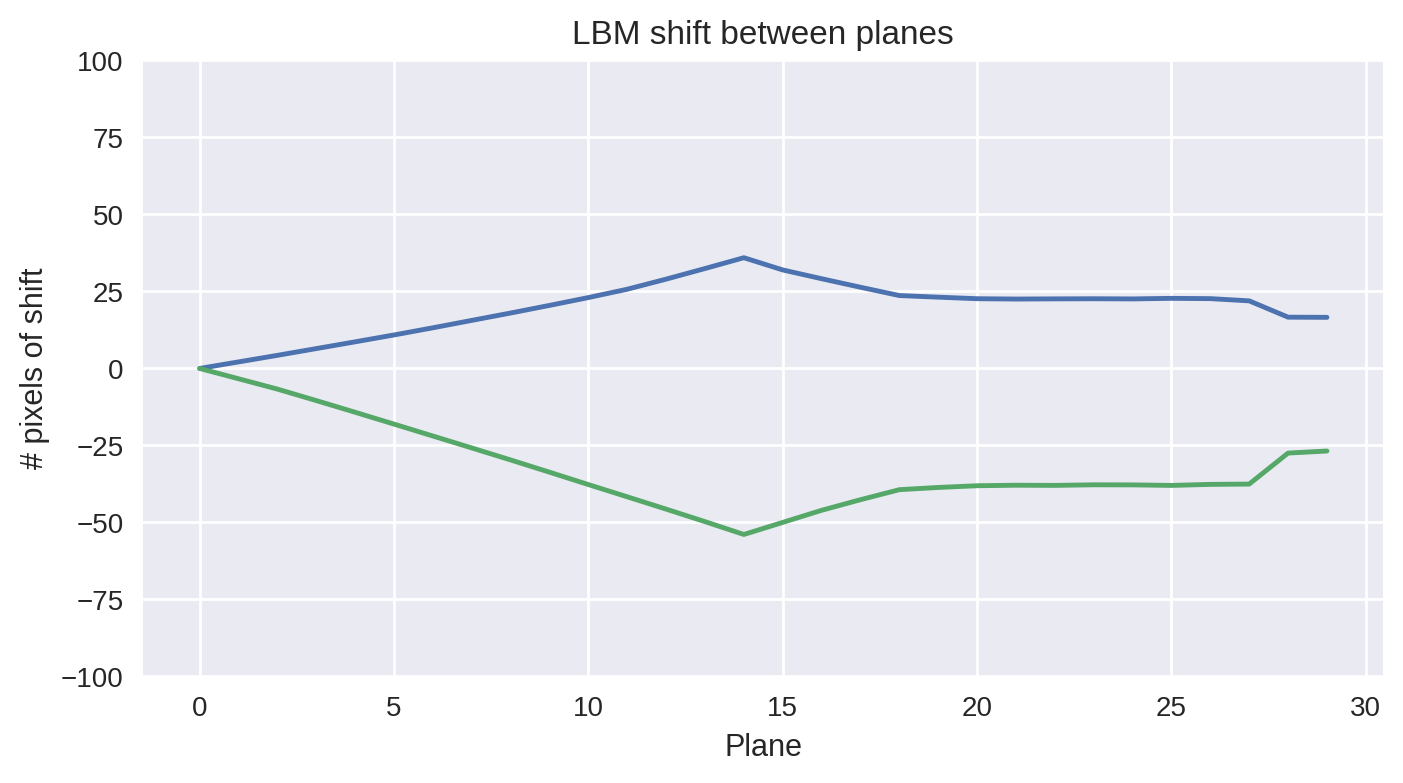

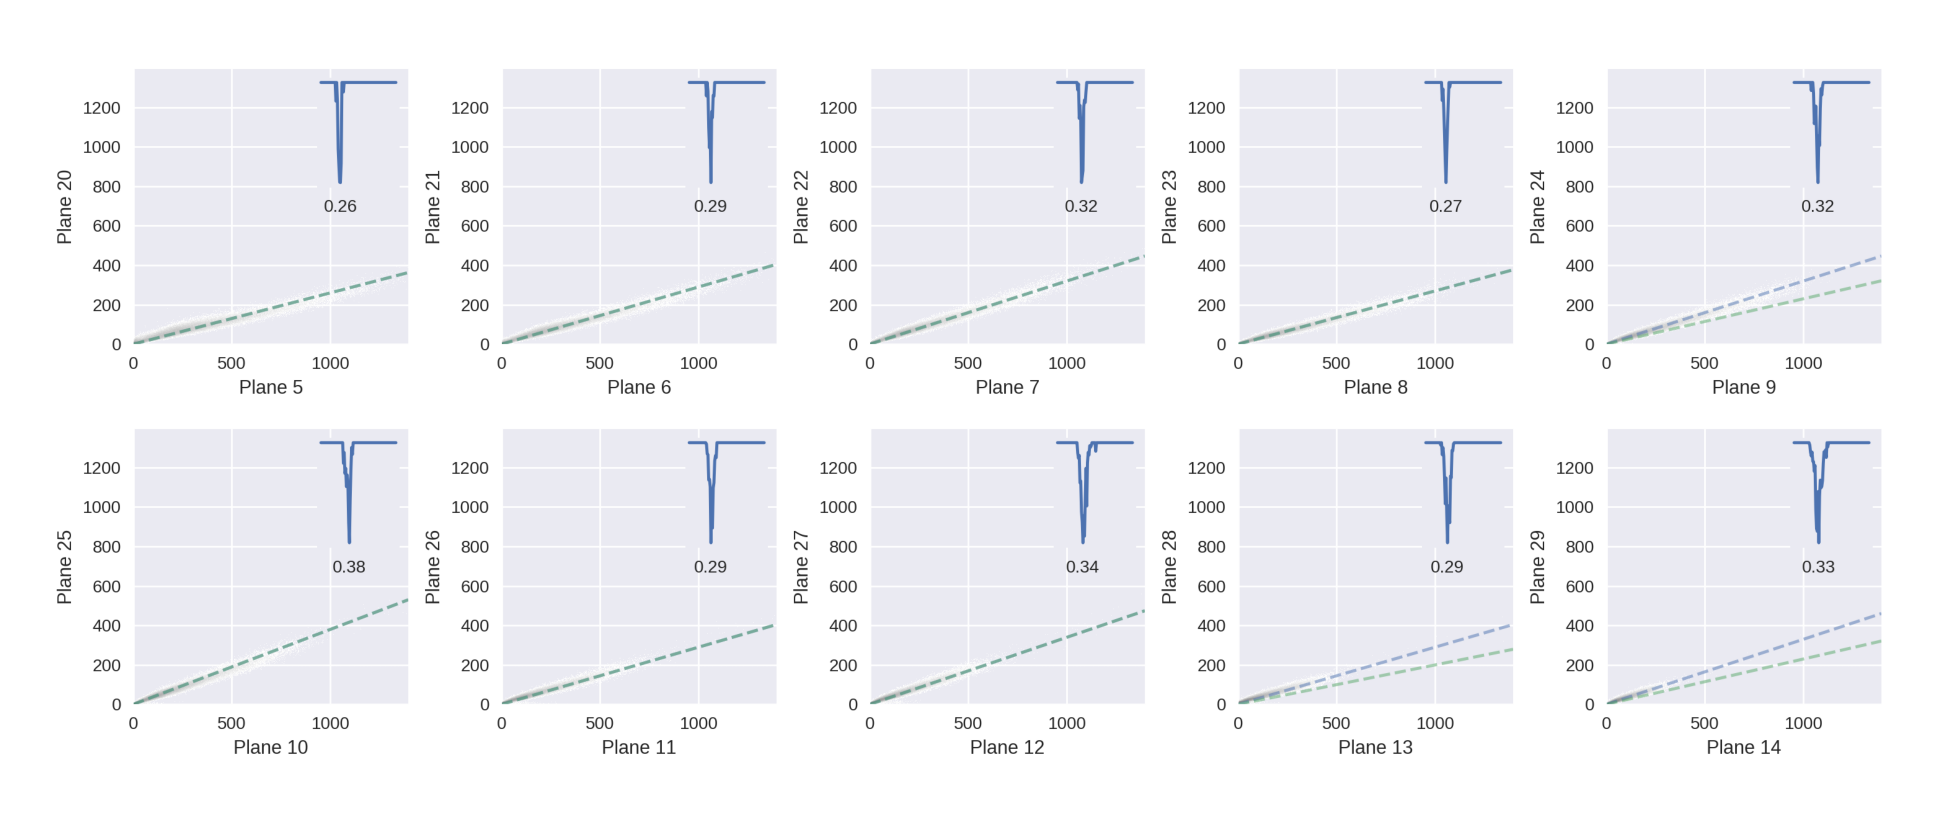

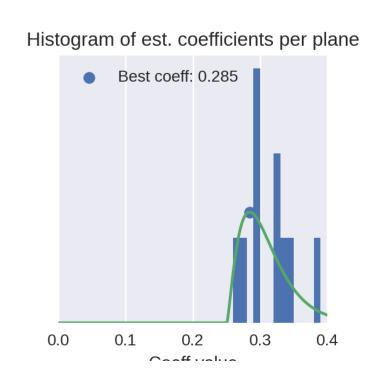

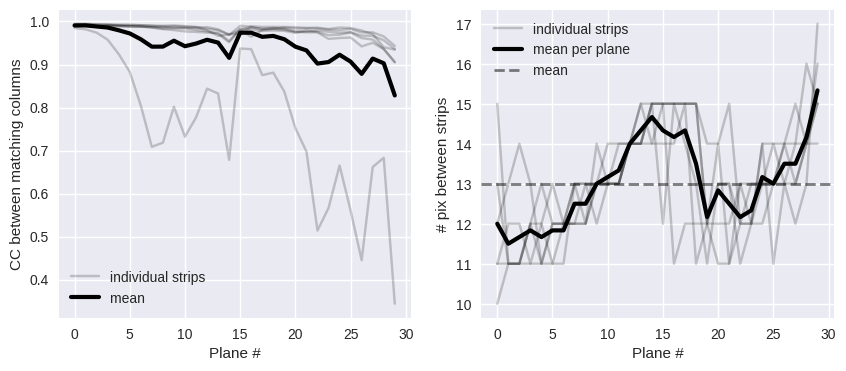

In [20]:
job.show_summary_plots()

In [10]:
# split the large tiffs into files of size 100 after registration
job.params['split_tif_size'] = 100

In [8]:
%%time
job.register_gpu()

      Found dir /mnt/md0/runs/s3d-Demo-GPU/registered_fused_data with tag registered_fused_data
Will analyze 2 tifs in 2 batches
   Enforcing positivity
   Launching IO thread
      Loading /mnt/md0/data/demo/AH007_ROI3p33um_NOSCREEN_-400um_00001_00001.tif
         Memory at batch 0.  Total Used: 022.722 GB, Virtual Available: 480.474 GB, Virtual Used: 022.722 GB, Swap Used: 000.000 GB
Loading Batch 0 of 1


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 6.82 GB
   Batch 0 IO thread joined
         Memory after IO thread joinTotal Used: 029.584 GB, Virtual Available: 473.612 GB, Virtual Used: 029.584 GB, Swap Used: 000.000 GB
   Launching IO thread for next batch
      Loading /mnt/md0/data/demo/AH007_ROI3p33um_NOSCREEN_-400um_00001_00002.tif
         After IO thread launch:Total Used: 036.409 GB, Virtual Available: 466.787 GB, Virtual Used: 036.409 GB, Swap Used: 000.000 GB
      Loaded batch of size (30, 100, 1202, 1015)
      Sending frames 0-10 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 1.59 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         Mov of shape 30, 10, 1256, 973; 2.73 GB
         Allocating memory for shifted movie
         Registered batch in 0.06 sec
         Shifted batch in 0.29 sec
         Freeing all blocks
      Completed rigid registration in 2.02 sec
         Alloca

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Computed SNR and smoothed phase corrs in 1.66 sec
         Computed subpixel shifts in 0.02 sec
      Computed non-rigid shifts in 2.94 sec
      Transferred to CPU in 0.52 sec
   Non rigid transformed (on CPU) in 3.01 sec
      Sending frames 20-30 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.53 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         Mov of shape 30, 10, 1256, 973; 2.73 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.29 sec
         Freeing all blocks
      Completed rigid registration in 0.88 sec
         Allocated GPU array for non-rigid reg in 0.25 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.0

         Registered batch in 0.02 sec
         Shifted batch in 0.30 sec
         Freeing all blocks
      Completed rigid registration in 0.88 sec
         Allocated GPU array for non-rigid reg in 0.23 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.02 sec
      Computed non-rigid shifts in 1.48 sec
      Transferred to CPU in 0.36 sec
   Non rigid transformed (on CPU) in 1.96 sec
      Sending frames 10-20 to GPU for rigid registration
         Loaded mov and masks to GPU for rigid reg in 0.49 sec
         Subtracting min pix vals to enforce positivity
         Subtracting crosstalk
         Fusing and padding movie
         Mov of shape 30, 10, 1256, 973; 2.73 GB
         Allocating memory for shifted movie
         Registered batch in 0.02 sec
         Shifted batch in 0.29 sec
         Freeing all

         Allocated GPU array for non-rigid reg in 0.25 sec
   Clipped movie in 0.00 sec
   Split movie into blocks in 0.00 sec
   Completed FFT of blocks and computed phase correlations in 0.00 sec
   Computed SNR and smoothed phase corrs in 0.35 sec
         Computed subpixel shifts in 0.02 sec
      Computed non-rigid shifts in 1.48 sec
      Transferred to CPU in 0.35 sec
   Non rigid transformed (on CPU) in 1.89 sec
      Concatenating movie
         Concat in 3.44 sec
      Saving fused, registered file of shape (30, 100, 1256, 973) to /mnt/md0/runs/s3d-Demo-GPU/registered_fused_data/fused_reg_data0001.npy
CPU times: user 6min 7s, sys: 1min 29s, total: 7min 36s
Wall time: 3min 47s


In [31]:
mov_full = job.get_registered_movie('registered_fused_data','f')
im_full = mov_full.mean(axis=1).compute()

In [33]:
mov_full.shape

(30, 200, 1256, 973)

In [11]:
# find crop values that minimize dark zones
crop = ((0,18), (100,1100), (50, 900))

In [18]:
job.params['n_svd_comp'] = 200
job.params['svd_crop'] = crop
job.params['svd_block_shape'] = (4,200,200)
job.params['svd_block_overlaps'] = (2,100,100)
svd_dir_tag = 'svd_cropped'

In [15]:
# for short recordings, might be faster to set this high, e.g. 16-32
# for longer recordings (1000+frames), set to 1 or 2
# the Dask SVD speed is pretty variable based on the block shape, n_svd_comp, 
#    duration of recording and this parameter
job.params['n_svd_blocks_per_batch']=4

In [17]:
job.make_new_dir(svd_dir_tag)
svd_info = job.svd_decompose_movie(svd_dir_tag, run_svd=True, mov_shape_tfirst=False)

      Found dir /mnt/md0/runs/s3d-Demo-GPU/svd_cropped with tag svd_cropped
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/svd_cropped
   Updated main params file
   Loaded mov of size (30, 200, 1256, 973)
   Cropped to size (18, 200, 1000, 850)
   Time-cropped to size (18, 200, 1000, 850)
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/svd_cropped
   Updated main params file
576 blocks with overlap (125 without, 4.61x increase)
   Will compute SVD in 576 blocks in a grid shaped (8, 9, 8)
   Batching 4 blocks together, for a total of 144 batches. Pix chunksize: 80000
   Saving SVD blocks in /mnt/md0/runs/s3d-Demo-GPU/svd_cropped/blocks
Starting with batch 0
      Starting batch 1 / 144, blocks 0 - 4
      Sending batch 1 to dask
      Dask completed in 11.379 sec
      Saving svd_info to /mnt/md0/runs/s3d-Demo-GPU/svd_cropped/svd_info.npy
   Batch 1 completed in 11.457
   Estimated time remaining for 143 batches: 00h27m18s
      Starting batch 2 / 144, blocks 4 - 8
   

      Dask completed in 11.282 sec
      Saving svd_info to /mnt/md0/runs/s3d-Demo-GPU/svd_cropped/svd_info.npy
   Batch 29 completed in 11.369
   Estimated time remaining for 115 batches: 00h22m22s
      Starting batch 30 / 144, blocks 116 - 120
      Sending batch 30 to dask
      Dask completed in 11.304 sec
      Saving svd_info to /mnt/md0/runs/s3d-Demo-GPU/svd_cropped/svd_info.npy
   Batch 30 completed in 11.398
   Estimated time remaining for 114 batches: 00h22m04s
      Starting batch 31 / 144, blocks 120 - 124
      Sending batch 31 to dask
      Dask completed in 11.328 sec
      Saving svd_info to /mnt/md0/runs/s3d-Demo-GPU/svd_cropped/svd_info.npy
   Batch 31 completed in 11.413
   Estimated time remaining for 113 batches: 00h21m48s
      Starting batch 32 / 144, blocks 124 - 128
      Sending batch 32 to dask
      Dask completed in 11.793 sec
      Saving svd_info to /mnt/md0/runs/s3d-Demo-GPU/svd_cropped/svd_info.npy
   Batch 32 completed in 11.879
   Estimated time rema

      Dask completed in 11.473 sec
      Saving svd_info to /mnt/md0/runs/s3d-Demo-GPU/svd_cropped/svd_info.npy
   Batch 59 completed in 11.615
   Estimated time remaining for 85 batches: 00h16m19s
      Starting batch 60 / 144, blocks 236 - 240
      Sending batch 60 to dask
      Dask completed in 11.063 sec
      Saving svd_info to /mnt/md0/runs/s3d-Demo-GPU/svd_cropped/svd_info.npy
   Batch 60 completed in 11.150
   Estimated time remaining for 84 batches: 00h16m01s
      Starting batch 61 / 144, blocks 240 - 244
      Sending batch 61 to dask
      Dask completed in 10.850 sec
      Saving svd_info to /mnt/md0/runs/s3d-Demo-GPU/svd_cropped/svd_info.npy
   Batch 61 completed in 10.936
   Estimated time remaining for 83 batches: 00h15m41s
      Starting batch 62 / 144, blocks 244 - 248
      Sending batch 62 to dask
      Dask completed in 11.289 sec
      Saving svd_info to /mnt/md0/runs/s3d-Demo-GPU/svd_cropped/svd_info.npy
   Batch 62 completed in 11.380
   Estimated time remaini

      Dask completed in 11.404 sec
      Saving svd_info to /mnt/md0/runs/s3d-Demo-GPU/svd_cropped/svd_info.npy
   Batch 89 completed in 11.491
   Estimated time remaining for 55 batches: 00h10m16s
      Starting batch 90 / 144, blocks 356 - 360
      Sending batch 90 to dask
      Dask completed in 11.618 sec
      Saving svd_info to /mnt/md0/runs/s3d-Demo-GPU/svd_cropped/svd_info.npy
   Batch 90 completed in 11.705
   Estimated time remaining for 54 batches: 00h10m10s
      Starting batch 91 / 144, blocks 360 - 364
      Sending batch 91 to dask
      Dask completed in 10.881 sec
      Saving svd_info to /mnt/md0/runs/s3d-Demo-GPU/svd_cropped/svd_info.npy
   Batch 91 completed in 10.968
   Estimated time remaining for 53 batches: 00h09m55s
      Starting batch 92 / 144, blocks 364 - 368
      Sending batch 92 to dask
      Dask completed in 11.912 sec
      Saving svd_info to /mnt/md0/runs/s3d-Demo-GPU/svd_cropped/svd_info.npy
   Batch 92 completed in 11.999
   Estimated time remaini

      Dask completed in 11.486 sec
      Saving svd_info to /mnt/md0/runs/s3d-Demo-GPU/svd_cropped/svd_info.npy
   Batch 119 completed in 11.573
   Estimated time remaining for 25 batches: 00h04m46s
      Starting batch 120 / 144, blocks 476 - 480
      Sending batch 120 to dask
      Dask completed in 11.808 sec
      Saving svd_info to /mnt/md0/runs/s3d-Demo-GPU/svd_cropped/svd_info.npy
   Batch 120 completed in 11.896
   Estimated time remaining for 24 batches: 00h04m37s
      Starting batch 121 / 144, blocks 480 - 484
      Sending batch 121 to dask
      Dask completed in 10.905 sec
      Saving svd_info to /mnt/md0/runs/s3d-Demo-GPU/svd_cropped/svd_info.npy
   Batch 121 completed in 10.992
   Estimated time remaining for 23 batches: 00h04m23s
      Starting batch 122 / 144, blocks 484 - 488
      Sending batch 122 to dask
      Dask completed in 12.352 sec
      Saving svd_info to /mnt/md0/runs/s3d-Demo-GPU/svd_cropped/svd_info.npy
   Batch 122 completed in 12.440
   Estimated ti

In [19]:
svd_info = n.load(os.path.join(job.dirs[svd_dir_tag], 'svd_info.npy'),allow_pickle=True).item()

In [12]:
job.params['t_batch_size'] = 100
job.params['n_proc_corr'] = 70
job.params['n_svd_comp'] = 200
job.params['intensity_thresh'] = 0.25
job.params['mproc_batchsize'] = 5
params_to_sweep = {
    'intensity_thresh' : (0.2,),
    'n_svd_comp' : (50,),
    'conv_filt_xy': (0.5,0.75, 1.0),
    'npil_filt_xy': (2.5,4.0,5.5),
    'conv_filt_z' : (0.5,0.75, 1.0),
    'npil_filt_z' : (0.5,1.0, 1.5),
    'sdnorm_exp' : (0.8, 1.0)
}
# best for this sweep:
# sdnorm_exp: 0.8
# npil_filt_z : 1.0 
# conv_filt_z : 1.0
# conv_filt_xy: 1.0
# npil_filt_xy: 2.5

In [57]:
from suite3d import svd_utils as svu
movx = svu.reconstruct_overlapping_movie(svd_info, t_indices = (0, 100),n_comps=50)

In [64]:
sweep_summary = job.sweep_params(params_to_sweep, mov = movx,testing_dir_tag='sweep-full-50',
                           do_vmap=True, all_combinations=True, n_test_iters = 1)
# v = job.vis_vmap_sweep(sweep_summary)

   Created dir /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50 with tag sweep-full-50
   Created dir /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00000 with tag sweep-full-50-comb_00000
   Created dir /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00001 with tag sweep-full-50-comb_00001
   Created dir /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00002 with tag sweep-full-50-comb_00002
   Created dir /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00003 with tag sweep-full-50-comb_00003
   Created dir /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00004 with tag sweep-full-50-comb_00004
   Created dir /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00005 with tag sweep-full-50-comb_00005
   Created dir /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00006 with tag sweep-full-50-comb_00006
   Created dir /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00007 with tag sweep-full-50-comb_00007
 

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 50.51 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00000/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00000/mov_sub
Running combination 02/162Total Used: 142.786 GB, Virtual Available: 360.410 GB, Virtual Used: 142.786 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00001-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_0.500-npil_filt_xy_2.500-conv_filt_z_0.500-npil_filt_z_0.500-sdnorm_exp_1.000
      Saving to tag sweep-full-50-comb_00001 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00001
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00001
   Updated main params file
   Created dir

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 49.87 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00005/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00005/mov_sub
Running combination 07/162Total Used: 143.452 GB, Virtual Available: 359.744 GB, Virtual Used: 143.452 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00006-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_0.500-npil_filt_xy_2.500-conv_filt_z_0.750-npil_filt_z_0.500-sdnorm_exp_0.800
      Saving to tag sweep-full-50-comb_00006 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00006
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00006
   Updated main params file
   Created dir

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 49.97 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00010/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00010/mov_sub
Running combination 12/162Total Used: 144.053 GB, Virtual Available: 359.143 GB, Virtual Used: 144.053 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00011-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_0.500-npil_filt_xy_2.500-conv_filt_z_0.750-npil_filt_z_1.500-sdnorm_exp_1.000
      Saving to tag sweep-full-50-comb_00011 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00011
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00011
   Updated main params file
   Created dir

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 49.69 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00015/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00015/mov_sub
Running combination 17/162Total Used: 144.640 GB, Virtual Available: 358.556 GB, Virtual Used: 144.640 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00016-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_0.500-npil_filt_xy_2.500-conv_filt_z_1.000-npil_filt_z_1.500-sdnorm_exp_0.800
      Saving to tag sweep-full-50-comb_00016 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00016
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00016
   Updated main params file
   Created dir

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 50.37 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00020/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00020/mov_sub
Running combination 22/162Total Used: 145.196 GB, Virtual Available: 358.000 GB, Virtual Used: 145.196 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00021-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_0.500-npil_filt_xy_4.000-conv_filt_z_0.500-npil_filt_z_1.000-sdnorm_exp_1.000
      Saving to tag sweep-full-50-comb_00021 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00021
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00021
   Updated main params file
   Created dir

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 50.44 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00025/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00025/mov_sub
Running combination 27/162Total Used: 145.830 GB, Virtual Available: 357.366 GB, Virtual Used: 145.830 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00026-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_0.500-npil_filt_xy_4.000-conv_filt_z_0.750-npil_filt_z_1.000-sdnorm_exp_0.800
      Saving to tag sweep-full-50-comb_00026 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00026
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00026
   Updated main params file
   Created dir

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 50.61 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00030/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00030/mov_sub
Running combination 32/162Total Used: 146.353 GB, Virtual Available: 356.843 GB, Virtual Used: 146.353 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00031-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_0.500-npil_filt_xy_4.000-conv_filt_z_1.000-npil_filt_z_0.500-sdnorm_exp_1.000
      Saving to tag sweep-full-50-comb_00031 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00031
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00031
   Updated main params file
   Created dir

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 52.64 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00035/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00035/mov_sub
Running combination 37/162Total Used: 147.068 GB, Virtual Available: 356.128 GB, Virtual Used: 147.068 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00036-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_0.500-npil_filt_xy_5.500-conv_filt_z_0.500-npil_filt_z_0.500-sdnorm_exp_0.800
      Saving to tag sweep-full-50-comb_00036 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00036
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00036
   Updated main params file
   Created dir

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 52.61 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00040/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00040/mov_sub
Running combination 42/162Total Used: 147.661 GB, Virtual Available: 355.535 GB, Virtual Used: 147.661 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00041-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_0.500-npil_filt_xy_5.500-conv_filt_z_0.500-npil_filt_z_1.500-sdnorm_exp_1.000
      Saving to tag sweep-full-50-comb_00041 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00041
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00041
   Updated main params file
   Created dir

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 52.96 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00045/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00045/mov_sub
Running combination 47/162Total Used: 149.094 GB, Virtual Available: 354.102 GB, Virtual Used: 149.094 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00046-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_0.500-npil_filt_xy_5.500-conv_filt_z_0.750-npil_filt_z_1.500-sdnorm_exp_0.800
      Saving to tag sweep-full-50-comb_00046 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00046
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00046
   Updated main params file
   Created dir

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 53.57 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00050/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00050/mov_sub
Running combination 52/162Total Used: 149.643 GB, Virtual Available: 353.553 GB, Virtual Used: 149.643 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00051-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_0.500-npil_filt_xy_5.500-conv_filt_z_1.000-npil_filt_z_1.000-sdnorm_exp_1.000
      Saving to tag sweep-full-50-comb_00051 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00051
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00051
   Updated main params file
   Created dir

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 52.12 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00055/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00055/mov_sub
Running combination 57/162Total Used: 150.002 GB, Virtual Available: 353.194 GB, Virtual Used: 150.002 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00056-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_0.750-npil_filt_xy_2.500-conv_filt_z_0.500-npil_filt_z_1.000-sdnorm_exp_0.800
      Saving to tag sweep-full-50-comb_00056 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00056
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00056
   Updated main params file
   Created dir

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 49.82 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00062/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00062/mov_sub
Running combination 64/162Total Used: 150.855 GB, Virtual Available: 352.341 GB, Virtual Used: 150.855 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00063-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_0.750-npil_filt_xy_2.500-conv_filt_z_0.750-npil_filt_z_1.000-sdnorm_exp_1.000
      Saving to tag sweep-full-50-comb_00063 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00063
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00063
   Updated main params file
   Created dir

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 50.60 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00067/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00067/mov_sub
Running combination 69/162Total Used: 151.297 GB, Virtual Available: 351.898 GB, Virtual Used: 151.297 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00068-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_0.750-npil_filt_xy_2.500-conv_filt_z_1.000-npil_filt_z_1.000-sdnorm_exp_0.800
      Saving to tag sweep-full-50-comb_00068 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00068
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00068
   Updated main params file
   Created dir

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 50.12 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00072/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00072/mov_sub
Running combination 74/162Total Used: 151.915 GB, Virtual Available: 351.281 GB, Virtual Used: 151.915 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00073-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_0.750-npil_filt_xy_4.000-conv_filt_z_0.500-npil_filt_z_0.500-sdnorm_exp_1.000
      Saving to tag sweep-full-50-comb_00073 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00073
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00073
   Updated main params file
   Created dir

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 52.49 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00077/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00077/mov_sub
Running combination 79/162Total Used: 153.628 GB, Virtual Available: 349.568 GB, Virtual Used: 153.628 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00078-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_0.750-npil_filt_xy_4.000-conv_filt_z_0.750-npil_filt_z_0.500-sdnorm_exp_0.800
      Saving to tag sweep-full-50-comb_00078 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00078
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00078
   Updated main params file
   Created dir

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 52.94 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00082/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00082/mov_sub
Running combination 84/162Total Used: 153.166 GB, Virtual Available: 350.030 GB, Virtual Used: 153.166 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00083-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_0.750-npil_filt_xy_4.000-conv_filt_z_0.750-npil_filt_z_1.500-sdnorm_exp_1.000
      Saving to tag sweep-full-50-comb_00083 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00083
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00083
   Updated main params file
   Created dir

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 51.78 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00087/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00087/mov_sub
Running combination 89/162Total Used: 153.503 GB, Virtual Available: 349.693 GB, Virtual Used: 153.503 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00088-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_0.750-npil_filt_xy_4.000-conv_filt_z_1.000-npil_filt_z_1.500-sdnorm_exp_0.800
      Saving to tag sweep-full-50-comb_00088 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00088
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00088
   Updated main params file
   Created dir

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 50.93 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00092/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00092/mov_sub
Running combination 94/162Total Used: 154.115 GB, Virtual Available: 349.081 GB, Virtual Used: 154.115 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00093-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_0.750-npil_filt_xy_5.500-conv_filt_z_0.500-npil_filt_z_1.000-sdnorm_exp_1.000
      Saving to tag sweep-full-50-comb_00093 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00093
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00093
   Updated main params file
   Created dir

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 51.72 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00097/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00097/mov_sub
Running combination 99/162Total Used: 154.729 GB, Virtual Available: 348.467 GB, Virtual Used: 154.729 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00098-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_0.750-npil_filt_xy_5.500-conv_filt_z_0.750-npil_filt_z_1.000-sdnorm_exp_0.800
      Saving to tag sweep-full-50-comb_00098 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00098
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00098
   Updated main params file
   Created dir

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 51.25 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00102/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00102/mov_sub
Running combination 104/162Total Used: 155.302 GB, Virtual Available: 347.894 GB, Virtual Used: 155.302 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00103-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_0.750-npil_filt_xy_5.500-conv_filt_z_1.000-npil_filt_z_0.500-sdnorm_exp_1.000
      Saving to tag sweep-full-50-comb_00103 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00103
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00103
   Updated main params file
   Created di

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 51.20 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00107/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00107/mov_sub
Running combination 109/162Total Used: 155.928 GB, Virtual Available: 347.268 GB, Virtual Used: 155.928 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00108-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_1.000-npil_filt_xy_2.500-conv_filt_z_0.500-npil_filt_z_0.500-sdnorm_exp_0.800
      Saving to tag sweep-full-50-comb_00108 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00108
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00108
   Updated main params file
   Created di

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 50.70 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00112/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00112/mov_sub
Running combination 114/162Total Used: 156.497 GB, Virtual Available: 346.699 GB, Virtual Used: 156.497 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00113-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_1.000-npil_filt_xy_2.500-conv_filt_z_0.500-npil_filt_z_1.500-sdnorm_exp_1.000
      Saving to tag sweep-full-50-comb_00113 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00113
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00113
   Updated main params file
   Created di

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 50.36 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00117/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00117/mov_sub
Running combination 119/162Total Used: 157.072 GB, Virtual Available: 346.124 GB, Virtual Used: 157.072 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00118-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_1.000-npil_filt_xy_2.500-conv_filt_z_0.750-npil_filt_z_1.500-sdnorm_exp_0.800
      Saving to tag sweep-full-50-comb_00118 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00118
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00118
   Updated main params file
   Created di

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 50.62 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00122/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00122/mov_sub
Running combination 124/162Total Used: 157.729 GB, Virtual Available: 345.467 GB, Virtual Used: 157.729 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00123-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_1.000-npil_filt_xy_2.500-conv_filt_z_1.000-npil_filt_z_1.000-sdnorm_exp_1.000
      Saving to tag sweep-full-50-comb_00123 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00123
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00123
   Updated main params file
   Created di

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 50.70 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00127/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00127/mov_sub
Running combination 129/162Total Used: 158.331 GB, Virtual Available: 344.865 GB, Virtual Used: 158.331 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00128-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_1.000-npil_filt_xy_4.000-conv_filt_z_0.500-npil_filt_z_1.000-sdnorm_exp_0.800
      Saving to tag sweep-full-50-comb_00128 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00128
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00128
   Updated main params file
   Created di

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 50.99 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00132/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00132/mov_sub
Running combination 134/162Total Used: 158.857 GB, Virtual Available: 344.339 GB, Virtual Used: 158.857 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00133-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_1.000-npil_filt_xy_4.000-conv_filt_z_0.750-npil_filt_z_0.500-sdnorm_exp_1.000
      Saving to tag sweep-full-50-comb_00133 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00133
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00133
   Updated main params file
   Created di

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 51.24 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00137/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00137/mov_sub
Running combination 139/162Total Used: 159.405 GB, Virtual Available: 343.791 GB, Virtual Used: 159.405 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00138-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_1.000-npil_filt_xy_4.000-conv_filt_z_1.000-npil_filt_z_0.500-sdnorm_exp_0.800
      Saving to tag sweep-full-50-comb_00138 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00138
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00138
   Updated main params file
   Created di

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 51.28 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00142/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00142/mov_sub
Running combination 144/162Total Used: 159.986 GB, Virtual Available: 343.210 GB, Virtual Used: 159.986 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00143-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_1.000-npil_filt_xy_4.000-conv_filt_z_1.000-npil_filt_z_1.500-sdnorm_exp_1.000
      Saving to tag sweep-full-50-comb_00143 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00143
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00143
   Updated main params file
   Created di

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 51.44 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00147/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00147/mov_sub
Running combination 149/162Total Used: 160.608 GB, Virtual Available: 342.588 GB, Virtual Used: 160.608 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00148-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_1.000-npil_filt_xy_5.500-conv_filt_z_0.500-npil_filt_z_1.500-sdnorm_exp_0.800
      Saving to tag sweep-full-50-comb_00148 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00148
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00148
   Updated main params file
   Created di

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 52.33 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00152/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00152/mov_sub
Running combination 154/162Total Used: 161.003 GB, Virtual Available: 342.193 GB, Virtual Used: 161.003 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00153-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_1.000-npil_filt_xy_5.500-conv_filt_z_0.750-npil_filt_z_1.000-sdnorm_exp_1.000
      Saving to tag sweep-full-50-comb_00153 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00153
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00153
   Updated main params file
   Created di

      Loaded and swapped, idx 0 to 100
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 51.60 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00157/iters/batch0000
   Removing mov_sub from /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00157/mov_sub
Running combination 159/162Total Used: 161.557 GB, Virtual Available: 341.639 GB, Virtual Used: 161.557 GB, Swap Used: 000.000 GB
   Summary dict size: 00 GB
      Combination params: comb00158-params-intensity_thresh_0.200-n_svd_comp_50.000-conv_filt_xy_1.000-npil_filt_xy_5.500-conv_filt_z_1.000-npil_filt_z_1.000-sdnorm_exp_0.800
      Saving to tag sweep-full-50-comb_00158 at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00158
   Saved a copy of params at /mnt/md0/runs/s3d-Demo-GPU/sweep-full-50/sweep-full-50-comb_00158
   Updated main params file
   Created di

In [20]:
svd_info['mov_shape']

(18, 200, 1000, 850)

In [22]:
job.params['t_batch_size'] = 200
job.params['n_proc_corr'] = 70
job.params['n_svd_comp'] = 50
job.params['mproc_batchsize'] = 5
job.params['n_svd_comp'] = 50
job.params['intensity_thresh'] : 0.2
job.params['conv_filt_xy'] = 1.0
job.params['npil_filt_xy'] = 2.5
job.params['conv_filt_z'] = 1.0
job.params['npil_filt_z']=  1.0
job.params['sdnorm_exp']= 0.8

In [23]:
vmap, mean_image, max_img, __, __ = job.calculate_corr_map(mov = svd_info)

   Updated main params file
      Found dir /mnt/md0/runs/s3d-Demo-GPU/mov_sub with tag mov_sub
   Saving mov_sub to /mnt/md0/runs/s3d-Demo-GPU/mov_sub
   Using conv_filt: gaussian, 1.00, 1.00
   Using np_filt: gaussian, 1.00, 2.50
   Will reconstruct SVD movie on-the-fly from  with 50 components
   Created files and dirs for 1 batches
      Running batch 1 of 1
         Will process 200 frames (0-200, t_batch_size: 200)
         Reconstructing from svd (re-loading spatial components each iteration)
Sending all blocks to dask to compute
Dask reconstruction complete
         Reconstructed (200, 18, 1000, 850) mov in 131.98 seconds
      Loaded and swapped, idx 0 to 200
      Calculating corr map
         Rolling mean filter
         Stdev over time
         Sharr creation
         Sub and conv
         Vmap
   Calculated corr map in 101.52 seconds
      Saving to /mnt/md0/runs/s3d-Demo-GPU/iters/batch0000


In [37]:
v = napari.view_image(vmap)

In [128]:
job.params['extend_thresh']

0.2

In [168]:
%%time
job.params['detection_timebin'] = 1 
job.params['detection_time_crop'] = (None,None)
job.params['max_pix'] = 250
job.params['peak_thresh'] = 3.8

job.params['activity_thresh'] = 1.0
job.params['extend_thresh'] = 0.3
job.params['max_iter'] = 10000 # maximum number of ROIs detected in given patch
combined_dir = job.patch_and_detect(combined_name='combined-test1', do_patch_idxs=(20,30,50,60,80,90))

   Loading from /mnt/md0/runs/s3d-Demo-GPU/iters/batch0000
99 blocks with overlap (72 without, 1.38x increase)
99 blocks with overlap (72 without, 1.38x increase)
   Detecting from patch: 20/6
   Updated main params file
      Found dir /mnt/md0/runs/s3d-Demo-GPU/detection with tag detection
      Found dir /mnt/md0/runs/s3d-Demo-GPU/detection/patch-0020 with tag patch-0020
   Running cell detection on patch 0020 at /mnt/md0/runs/s3d-Demo-GPU/detection/patch-0020, max 10000 iters
   Patch bounds are [ 0 18], [176 296], [182 302]
   Cell center bounds are [ 0 18], [192 280], [196 287]
   Time bounds are (None, None)
mov_sub
   Loading 0.19 GB movie to memory
   Loaded
   Loading from /mnt/md0/runs/s3d-Demo-GPU/iters/batch0000
      Movie shape: (200, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-Demo-GPU/detection/patch-0020
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 3.800 and Th2: 1.000
   Iter 0000: running 08 ROIs in parallel
 

      Added cell 89 at 05, 255, 263, peak: 4.062, thresh: 1.000, 55 frames, 12 pixels
      Added cell 90 at 03, 273, 196, peak: 4.055, thresh: 1.000, 53 frames, 13 pixels
      Added cell 91 at 09, 251, 249, peak: 4.052, thresh: 1.000, 41 frames, 23 pixels
      Added cell 92 at 12, 270, 226, peak: 4.036, thresh: 1.000, 56 frames, 15 pixels
      Added cell 93 at 07, 197, 217, peak: 4.029, thresh: 1.000, 39 frames, 7 pixels
      Added cell 94 at 03, 227, 239, peak: 4.024, thresh: 1.000, 65 frames, 15 pixels
      Added cell 95 at 02, 273, 208, peak: 4.024, thresh: 1.000, 76 frames, 36 pixels
      Added cell 96 at 07, 271, 280, peak: 4.023, thresh: 1.000, 51 frames, 16 pixels
   Iter 0012: running 08 ROIs in parallel
      Added cell 97 at 00, 245, 244, peak: 4.021, thresh: 1.000, 55 frames, 7 pixels
      Added cell 98 at 13, 229, 280, peak: 3.986, thresh: 1.000, 51 frames, 13 pixels
      Added cell 99 at 02, 258, 278, peak: 3.979, thresh: 1.000, 58 frames, 22 pixels
      Added ce

      Added cell 25 at 07, 339, 329, peak: 6.428, thresh: 1.000, 55 frames, 30 pixels
      Added cell 26 at 09, 357, 358, peak: 6.404, thresh: 1.000, 57 frames, 13 pixels
      Added cell 27 at 04, 310, 342, peak: 6.325, thresh: 1.000, 48 frames, 24 pixels
      Added cell 28 at 11, 308, 353, peak: 6.118, thresh: 1.000, 47 frames, 25 pixels
      Added cell 29 at 08, 301, 339, peak: 6.114, thresh: 1.000, 69 frames, 49 pixels
      Added cell 30 at 12, 288, 353, peak: 6.041, thresh: 1.000, 84 frames, 16 pixels
      Added cell 31 at 07, 335, 356, peak: 5.942, thresh: 1.000, 39 frames, 8 pixels
      Added cell 32 at 05, 295, 309, peak: 5.926, thresh: 1.000, 60 frames, 25 pixels
   Iter 0004: running 08 ROIs in parallel
      Added cell 33 at 08, 307, 350, peak: 5.789, thresh: 1.000, 61 frames, 43 pixels
      Added cell 34 at 07, 351, 312, peak: 5.739, thresh: 1.000, 45 frames, 19 pixels
      Added cell 35 at 03, 342, 313, peak: 5.733, thresh: 1.000, 59 frames, 26 pixels
      Added c

      Added cell 121 at 04, 319, 335, peak: 4.279, thresh: 1.000, 69 frames, 25 pixels
      Added cell 122 at 07, 302, 296, peak: 4.231, thresh: 1.000, 85 frames, 56 pixels
      Added cell 123 at 08, 363, 294, peak: 4.228, thresh: 1.000, 50 frames, 15 pixels
      Added cell 124 at 06, 352, 317, peak: 4.225, thresh: 1.000, 46 frames, 13 pixels
      Added cell 125 at 04, 362, 303, peak: 4.206, thresh: 1.000, 59 frames, 15 pixels
      Added cell 126 at 07, 327, 377, peak: 4.196, thresh: 1.000, 53 frames, 21 pixels
      Added cell 127 at 03, 350, 367, peak: 4.193, thresh: 1.000, 52 frames, 23 pixels
      Added cell 128 at 05, 363, 363, peak: 4.191, thresh: 1.000, 47 frames, 15 pixels
   Iter 0016: running 08 ROIs in parallel
      Added cell 129 at 11, 321, 296, peak: 4.180, thresh: 1.000, 55 frames, 27 pixels
      Added cell 130 at 13, 356, 355, peak: 4.176, thresh: 1.000, 46 frames, 34 pixels
      Added cell 131 at 07, 331, 288, peak: 4.175, thresh: 1.000, 49 frames, 6 pixels
  

      Added cell 217 at 10, 358, 321, peak: 3.830, thresh: 1.000, 70 frames, 60 pixels
      Added cell 218 at 03, 296, 336, peak: 3.828, thresh: 1.000, 65 frames, 25 pixels
      Added cell 219 at 04, 283, 296, peak: 3.823, thresh: 1.000, 52 frames, 11 pixels
      Added cell 220 at 09, 290, 354, peak: 3.821, thresh: 1.000, 50 frames, 22 pixels
      Added cell 221 at 08, 335, 316, peak: 3.819, thresh: 1.000, 47 frames, 24 pixels
      Added cell 222 at 07, 361, 295, peak: 3.819, thresh: 1.000, 49 frames, 14 pixels
      Added cell 223 at 03, 326, 356, peak: 3.817, thresh: 1.000, 56 frames, 24 pixels
      Added cell 224 at 11, 319, 369, peak: 3.816, thresh: 1.000, 60 frames, 33 pixels
   Iter 0028: running 07 ROIs in parallel
      Added cell 225 at 02, 306, 350, peak: 3.814, thresh: 1.000, 69 frames, 52 pixels
      Added cell 226 at 12, 315, 295, peak: 3.808, thresh: 1.000, 67 frames, 25 pixels
      Added cell 227 at 09, 324, 375, peak: 3.808, thresh: 1.000, 41 frames, 20 pixels
 

      Added cell 65 at 06, 518, 486, peak: 4.362, thresh: 1.000, 50 frames, 9 pixels
      Added cell 66 at 08, 512, 481, peak: 4.342, thresh: 1.000, 51 frames, 13 pixels
      Added cell 67 at 05, 499, 522, peak: 4.301, thresh: 1.000, 60 frames, 24 pixels
      Added cell 68 at 06, 505, 515, peak: 4.292, thresh: 1.000, 43 frames, 22 pixels
      Added cell 69 at 07, 496, 492, peak: 4.287, thresh: 1.000, 42 frames, 11 pixels
      Added cell 70 at 01, 485, 524, peak: 4.279, thresh: 1.000, 52 frames, 26 pixels
      Added cell 71 at 10, 460, 551, peak: 4.265, thresh: 1.000, 47 frames, 36 pixels
      Added cell 72 at 04, 533, 485, peak: 4.261, thresh: 1.000, 51 frames, 23 pixels
   Iter 0009: running 08 ROIs in parallel
      Added cell 73 at 16, 516, 544, peak: 4.247, thresh: 1.000, 61 frames, 13 pixels
      Added cell 74 at 09, 481, 542, peak: 4.240, thresh: 1.000, 57 frames, 14 pixels
      Added cell 75 at 00, 457, 481, peak: 4.234, thresh: 1.000, 89 frames, 277 pixels
      Added 

      Added cell 161 at 08, 542, 497, peak: 3.839, thresh: 1.000, 40 frames, 14 pixels
      Added cell 162 at 12, 470, 484, peak: 3.834, thresh: 1.000, 43 frames, 25 pixels
      Added cell 163 at 03, 493, 538, peak: 3.833, thresh: 1.000, 52 frames, 12 pixels
      Added cell 164 at 00, 538, 479, peak: 3.827, thresh: 1.000, 92 frames, 168 pixels
      Added cell 165 at 08, 486, 551, peak: 3.827, thresh: 1.000, 38 frames, 10 pixels
      Added cell 166 at 07, 508, 560, peak: 3.827, thresh: 1.000, 59 frames, 16 pixels
      Added cell 167 at 04, 533, 514, peak: 3.815, thresh: 1.000, 47 frames, 14 pixels
      Added cell 168 at 01, 500, 537, peak: 3.807, thresh: 1.000, 55 frames, 12 pixels
   Iter 0021: running 01 ROIs in parallel
      Added cell 169 at 04, 539, 493, peak: 3.800, thresh: 1.000, 55 frames, 22 pixels
      Iter 0022: peak is too small  - ending extraction
   Found 169 cells in 22 iterations
   Saving cells to /mnt/md0/runs/s3d-Demo-GPU/detection/patch-0050/stats.npy
   Sa

      Added cell 73 at 12, 598, 651, peak: 4.170, thresh: 1.000, 47 frames, 15 pixels
      Added cell 74 at 08, 607, 650, peak: 4.165, thresh: 1.000, 39 frames, 29 pixels
      Added cell 75 at 04, 604, 635, peak: 4.153, thresh: 1.000, 39 frames, 22 pixels
      Added cell 76 at 10, 568, 636, peak: 4.135, thresh: 1.000, 41 frames, 24 pixels
      Added cell 77 at 05, 598, 607, peak: 4.124, thresh: 1.000, 53 frames, 13 pixels
      Added cell 78 at 04, 621, 597, peak: 4.120, thresh: 1.000, 83 frames, 170 pixels
      Added cell 79 at 09, 613, 611, peak: 4.119, thresh: 1.000, 44 frames, 15 pixels
      Added cell 80 at 05, 625, 641, peak: 4.119, thresh: 1.000, 71 frames, 52 pixels
   Iter 0010: running 08 ROIs in parallel
      Added cell 81 at 04, 586, 606, peak: 4.111, thresh: 1.000, 79 frames, 295 pixels
      Added cell 82 at 16, 618, 631, peak: 4.104, thresh: 1.000, 56 frames, 15 pixels
      Added cell 83 at 06, 596, 643, peak: 4.103, thresh: 1.000, 45 frames, 33 pixels
      Adde

   Found 180 cells in 23 iterations
   Saving cells to /mnt/md0/runs/s3d-Demo-GPU/detection/patch-0060/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-Demo-GPU/detection/patch-0060/iscell.npy
   Detecting from patch: 80/6
   Updated main params file
      Found dir /mnt/md0/runs/s3d-Demo-GPU/detection with tag detection
      Found dir /mnt/md0/runs/s3d-Demo-GPU/detection/patch-0080 with tag patch-0080
   Running cell detection on patch 0080 at /mnt/md0/runs/s3d-Demo-GPU/detection/patch-0080, max 10000 iters
   Patch bounds are [ 0 18], [704 824], [730 850]
   Cell center bounds are [ 0 18], [720 808], [744 850]
   Time bounds are (None, None)
mov_sub
   Loading 0.19 GB movie to memory
   Loaded
   Loading from /mnt/md0/runs/s3d-Demo-GPU/iters/batch0000
      Movie shape: (200, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-Demo-GPU/detection/patch-0080
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 3.800 and Th2: 1.000
   Iter 00

      Movie shape: (200, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/runs/s3d-Demo-GPU/detection/patch-0090
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 3.800 and Th2: 1.000
   Iter 0000: running 01 ROIs in parallel
      Added cell 1 at 17, 939, 088, peak: 3.826, thresh: 1.000, 29 frames, 18 pixels
      Iter 0001: peak is too small  - ending extraction
   Found 1 cells in 1 iterations
   Saving cells to /mnt/md0/runs/s3d-Demo-GPU/detection/patch-0090/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-Demo-GPU/detection/patch-0090/iscell.npy
      Found dir /mnt/md0/runs/s3d-Demo-GPU/detection/combined-test1 with tag detection-combined-test1
      Found dir /mnt/md0/runs/s3d-Demo-GPU/detection/patch-0020 with tag detection-patch-0020
      Found dir /mnt/md0/runs/s3d-Demo-GPU/detection/patch-0030 with tag detection-patch-0030
      Found dir /mnt/md0/runs/s3d-Demo-GPU/detection/patch-0050 with tag detection-patch-0050
      Found dir /m

In [170]:
outputs = ui.load_outputs(job.dirs['detection-combined-test1'], load_traces=False)
v,layers = ui.create_ui(outputs, lam_max=0.3)
ui.add_callbacks_to_ui(v,layers,outputs,savedir=combined_dir, overwrite=True)

Cells
('vmap_peak', (3.800152, 4.808962440490723), 'peak_val', <function add_curation_sliders.<locals>.<lambda> at 0x7fa48e682af0>)


IndexError: index 1036 is out of bounds for axis 2 with size 850

In [119]:
%%time
# this will be accelerated to be faster soon! 
job.compute_npil_masks(combined_dir)

CPU times: user 54 s, sys: 4.48 s, total: 58.4 s
Wall time: 1min 15s


'/mnt/md0/runs/s3d-Demo-GPU/detection/combined-cells'

In [120]:
traces = job.extract_and_deconvolve(stats_dir = combined_dir)

   Updated main params file
   Cropping with bounds: ((0, 18), (100, 1100), (50, 900))
   Movie shape: (18, 200, 1000, 850)
8056
   Extracting 8056 valid cells, and saving cell flags to /mnt/md0/runs/s3d-Demo-GPU/detection/combined-cells/iscell_extracted.npy
   Extracting activity
Will extract in 1 batches of 500
Saving intermediate results to /mnt/md0/runs/s3d-Demo-GPU/detection/combined-cells
Extracting batch 0000 of 0001
Batch size: 11 GB
   Deconvolving
   Saving to /mnt/md0/runs/s3d-Demo-GPU/detection/combined-cells


'/mnt/md0/runs/s3d-Demo-GPU/detection/combined-cells'

In [131]:
outputs = ui.load_outputs(job.dirs['detection-combined-cells'], load_traces=True)
v,layers = ui.create_ui(outputs, lam_max=0.8)
ui.add_callbacks_to_ui(v,layers,outputs,savedir=combined_dir)

Found old curated iscell with 8056 of 8056 marked as cells
Saving old iscell_curated to backup path /mnt/md0/runs/s3d-Demo-GPU/detection/combined-full/iscell_curated_old_20-09-23_20-33-22.npy
Cells
Found old curated + slider-ed iscell with 8056 of 8056 marked as cells
Saving old iscell_curated to backup path /mnt/md0/runs/s3d-Demo-GPU/detection/combined-full/iscell_curated_slider_old_20-09-23_20-33-22.npy
('vmap_peak', (3.8000267, 4.976876735687256), 'peak_val', <function add_curation_sliders.<locals>.<lambda> at 0x7fa540a68790>)


In [54]:
outputs = ui.load_outputs(combined_dir, load_traces=True)
outputs['F'].shape

(18107, 9860)

In [ ]:
# Use the UCSF Chimera viewer to open the .mrc file to see your cells!

In [130]:
v1, v2 = ui.make_label_vols(outputs['stats'], outputs['vmap'].shape, 
            iscell =  outputs['iscell_curated_slider'], 
                  cmap='Blues', lam_max = 0.3)

KeyError: 'iscell_curated_slider'

In [58]:
tfu.save_mrc(combined_dir, 'curated_cells.mrc',v2[:,:,:,3], voxel_size=(4,4,15))